##### With the introduction of Semantic Link in Microsoft Fabric, we can now access Power BI semantic models directly using Python within notebooks. Before this feature, the ability to interact with data and measures in a semantic model (previously referred to as a dataset) was restricted to tools like Power BI Desktop, DAX Studio, or Excel. Now, with Python, we can query both the data and metadata of the model, and even explore workspace contents to integrate Power BI models with data science workflows. just how simple it is to get started and elevate your data analysis capabilities.
![semantic link diagram](https://learn.microsoft.com/en-us/fabric/data-science/media/semantic-link-overview/data-flow-with-semantic-link.png)

In [1]:
%pip install prophet

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 7, Finished, Available, Finished)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 112.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 45.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [3]:
import sempy.fabric as Fabric
import pandas as pd

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 10, Finished, Available, Finished)

In [4]:
Fabric.list_datasets()

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 11, Finished, Available, Finished)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,sm-demo,bcc69bad-b4cb-4c04-8cf0-32e2ae2ed566,2024-08-24 18:52:26,NaT
1,lakehouse_demo,b0a780bc-b913-426b-835a-6c8c2968bfe6,2021-02-12 23:00:58,NaT


In [5]:
workspace_name = 'My workspace'
report_name = 'sm-demo'
semantic_model_name = 'sm-demo'

df_reports = Fabric.list_reports(workspace=workspace_name)
df_reports
report_id = df_reports[df_reports['Name']==report_name]['Id'].iloc[0]

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 12, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sempy/_utils/_pandas_utils.py:148: UserWarning: Missing columns from backend: ['isFromPbix']
  warnings.warn(UserWarning(f"Missing columns from backend: {missing_columns}"))


In [6]:
from powerbiclient import Report
report = Report(group_id=None, report_id=report_id)
report

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 13, Finished, Available, Finished)

Report()

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 14, Finished, Available, Finished)

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 15, Finished, Available, Finished)

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 16, Finished, Available, Finished)

StatementMeta(, 371e48e8-97a0-4e36-8377-b1df9a9490e0, 17, Finished, Available, Finished)

In [18]:
Fabric.list_tables(dataset=semantic_model_name)

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 33, Finished, Available, Finished)

,Name,Description,Hidden,Data Category,Type
0,DimDate,,False,Time,Table
1,DimCustomer,,False,,Table
2,DimProduct,,False,,Table
3,FactSalesOrder,,False,,Table
4,Items,,False,,Table
5,Items Count,,False,,Calculated Table
6,sales_forcast,,False,,Table


In [19]:
df_columns = Fabric.list_columns(dataset=semantic_model_name)
df_columns

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 34, Finished, Available, Finished)

,Table Name,Column Name,Description,Type,Data Type,Hidden,Format String,Source,Data Category,Display Folder,...,Unique,Sort By Column,Summarize By,Is Available in MDX,Encoding Hint,State,Error Message,Alternate Of Base Column,Alternate Of Base Table,Modified Time
0,DimDate,DateKey,,Data,Int64,False,0,DateKey,,,...,False,Year,None,True,Default,Ready,,None,None,2024-09-10 00:00:42
1,DimDate,DateAltKey,,Data,DateTime,False,Long Date,DateAltKey,,,...,False,Month,None,True,Default,Ready,,None,None,2024-09-09 23:59:08
2,DimDate,DayOfWeek,,Data,Int64,False,0,DayOfWeek,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
3,DimDate,WeekDayName,,Data,String,False,,WeekDayName,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:08
4,DimDate,DayOfMonth,,Data,Int64,False,0,DayOfMonth,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
5,DimDate,Month,,Data,Int64,False,0,Month,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
6,DimDate,MonthName,,Data,String,False,,MonthName,,,...,False,Month,None,True,Default,Ready,,None,None,2024-09-10 00:01:25
7,DimDate,Year,,Data,Int64,False,0,Year,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:10:03
8,DimCustomer,CustomerKey,,Data,Int64,False,0,CustomerKey,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:37
9,DimCustomer,CustomerAltKey,,Data,String,False,,CustomerAltKey,,,...,False,None,None,True,Default,Ready,,None,None,2024-08-24 19:09:08


In [20]:
Fabric.refresh_tom_cache()
df_measures = Fabric.list_measures(dataset=semantic_model_name)
df_measures[["Measure Name","Measure Expression","Measure Data Type","Measure Description","Format String Definition"]]

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 35, Finished, Available, Finished)

,Measure Name,Measure Expression,Measure Data Type,Measure Description,Format String Definition
0,Products,DISTINCTCOUNT(DimProduct[ProductKey]),Int64,,None
1,Total Sales,SUM(FactSalesOrder[SalesTotal]),Double,,None
2,sales forcast,SUM(sales_forcast[yhat]),Double,,None


In [21]:
from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 36, Finished, Available, Finished)

In [22]:
relationships = Fabric.list_relationships(semantic_model_name)
relationships

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 37, Finished, Available, Finished)

,Multiplicity,From Table,From Column,To Table,To Column,Active,Cross Filtering Behavior,Security Filtering Behavior,Join On Date Behavior,Rely On Referential Integrity,State,Modified Time,Relationship Name
0,m:1,FactSalesOrder,ProductKey,DimProduct,ProductKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-01 19:04:40,AutoDetected_ebe1e8c7-d811-4fbf-b827-5676e6608517
1,m:1,FactSalesOrder,CustomerKey,DimCustomer,CustomerKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-01 19:04:40,5304b635-0994-2fea-e68f-9076e16b6e02
2,m:1,FactSalesOrder,SalesOrderDateKey,DimDate,DateKey,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-01 19:04:40,835fb548-1fab-cc7b-6414-618b236184de
3,m:1,FactSalesOrder,SalesOrderDateKey,sales_forcast,ds,True,OneDirection,OneDirection,DateAndTime,False,Ready,2024-09-10 00:07:21,2e53e9fe-2afb-92c8-e9dc-3fdb011b73da


StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 40, Finished, Available, Finished)

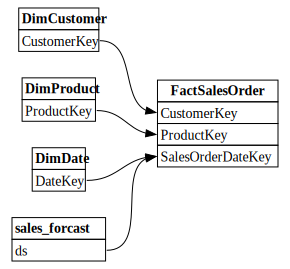

In [23]:
plot_relationship_metadata(relationships)

In [24]:
df_sales = Fabric.read_table(dataset=semantic_model_name, table='FactSalesOrder')
df_sales.head()

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 41, Finished, Available, Finished)

,SalesOrderKey,SalesOrderDateKey,ProductKey,CustomerKey,Quantity,SalesTotal
0,1237,20210102,831,281,10,3488.0
1,1258,20210105,711,29489,10,350.0
2,1260,20210106,780,625,10,23200.0
3,1267,20210107,815,30107,10,607.0
4,1287,20210110,973,696,10,17010.0


In [25]:
spark.createDataFrame(df_sales).write.saveAsTable('sales', mode='overwrite')

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 42, Finished, Available, Finished)

In [26]:
%%sql

DESCRIBE history sales

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 43, Finished, Available, Finished)

<Spark SQL result set with 6 rows and 15 fields>

In [27]:
from pyspark.sql.functions import *
df_lakehouse = spark.read.table('sales')
display(df_lakehouse.head(5))

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 44, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 72c82962-f424-445b-9f70-86c4068fb683)

In [28]:
df_lakehouse = df_lakehouse.withColumn('SalesOrderDateKey', col('SalesOrderDateKey').cast('string'))

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 45, Finished, Available, Finished)

In [29]:
df_lakehouse = df_lakehouse.withColumn("Date", to_date(unix_timestamp(col("SalesOrderDateKey"), "yyyyMMdd").cast("timestamp")))
df_lakehouse.show()

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 46, Finished, Available, Finished)

+-------------+-----------------+----------+-----------+--------+----------+----------+
|SalesOrderKey|SalesOrderDateKey|ProductKey|CustomerKey|Quantity|SalesTotal|      Date|
+-------------+-----------------+----------+-----------+--------+----------+----------+
|         1241|         20210102|       724|      29616|      11|    3709.0|2021-01-02|
|         1273|         20210108|       860|        119|      11|     269.0|2021-01-08|
|         1277|         20210108|       770|        426|      11|    8613.0|2021-01-08|
|         1280|         20210109|       834|        674|      11|    6543.0|2021-01-09|
|         1334|         20210121|       821|        394|      11|    2398.0|2021-01-21|
|         1370|         20210127|       720|      30064|      11|   15747.0|2021-01-27|
|         1392|         20210131|       819|        437|      11|    2732.0|2021-01-31|
|         1432|         20210206|       993|      29900|      11|    5940.0|2021-02-06|
|         1499|         20210216

In [30]:
df_lakehouse = df_lakehouse.withColumn("Year", year(col("Date"))) \
    .withColumn("Month", month(col("Date"))) \
    .withColumn("Day", dayofmonth(col("Date")))

df_lakehouse_agg = df_lakehouse.groupBy('Year', 'Month').agg(sum('SalesTotal').alias('TotalSales'))

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 47, Finished, Available, Finished)

In [31]:
display(df_lakehouse_agg.head(5))

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 48, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 988d1cc7-4f64-4a46-aca6-2388d574bbc0)

In [32]:
df_semantic_model = (
    Fabric.evaluate_measure(
        workspace=workspace_name,
        dataset=semantic_model_name,
        groupby_columns=["'DimDate'[Year]", "'DimDate'[Month]"],
        measure='Total Sales'
    )
)

df_semantic_model

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 49, Finished, Available, Finished)

,Year,Month,Total Sales
0,<NA>,<NA>,10284.0
1,2021,1,687029.0
2,2021,2,836937.0
3,2021,3,869863.0
4,2021,4,916273.0
5,2021,5,961241.0
6,2021,6,659677.0
7,2021,7,572189.0
8,2021,8,794832.0
9,2021,9,929086.0


In [33]:
#prepare for prophit
df_semantic_model = df_semantic_model.dropna()
df_semantic_model['ds'] = pd.to_datetime(df_semantic_model[['Year', 'Month']].assign(Day = 1))
df_semantic_model['y'] = df_semantic_model['Total Sales']

df_semantic_model.head()

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 50, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sempy/_metadata/_mdataframe.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result = attr(*args, **kwargs)
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/sempy/_metadata/_mdataframe.py:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result = attr(*args, **kwargs)


,Year,Month,Total Sales,ds,y
1,2021,1,687029.0,2021-01-01,687029.0
2,2021,2,836937.0,2021-02-01,836937.0
3,2021,3,869863.0,2021-03-01,869863.0
4,2021,4,916273.0,2021-04-01,916273.0
5,2021,5,961241.0,2021-05-01,961241.0


In [34]:
features = ['ds', 'y']
df_semantic_model = df_semantic_model[features]

df_semantic_model

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 51, Finished, Available, Finished)

,ds,y
1,2021-01-01,687029.0
2,2021-02-01,836937.0
3,2021-03-01,869863.0
4,2021-04-01,916273.0
5,2021-05-01,961241.0
6,2021-06-01,659677.0
7,2021-07-01,572189.0
8,2021-08-01,794832.0
9,2021-09-01,929086.0
10,2021-10-01,614116.0


In [35]:
from prophet import Prophet


StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 52, Finished, Available, Finished)

In [36]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_semantic_model[['ds', 'y']])

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 53, Finished, Available, Finished)

00:18:16 - cmdstanpy - INFO - Chain [1] start processing
00:18:26 - cmdstanpy - INFO - Chain [1] done processing


n_changepoints greater than number of observations. Using 18.
input tempfile: /tmp/tmpkfft5tqy/e6rtctdh.json
input tempfile: /tmp/tmpkfft5tqy/facdxyu6.json
idx 0
running CmdStan, num_threads: None
CmdStan args: ['/nfs4/pyenv-9190d0dd-d545-403f-ba3c-55c9d8e8f087/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61203', 'data', 'file=/tmp/tmpkfft5tqy/e6rtctdh.json', 'init=/tmp/tmpkfft5tqy/facdxyu6.json', 'output', 'file=/tmp/tmpkfft5tqy/prophet_modelnrw3j3pa/prophet_model-20240910001816.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
Chain [1] start processing
Chain [1] done processing


In [37]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 54, Finished, Available, Finished)

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 55, Finished, Available, Finished)

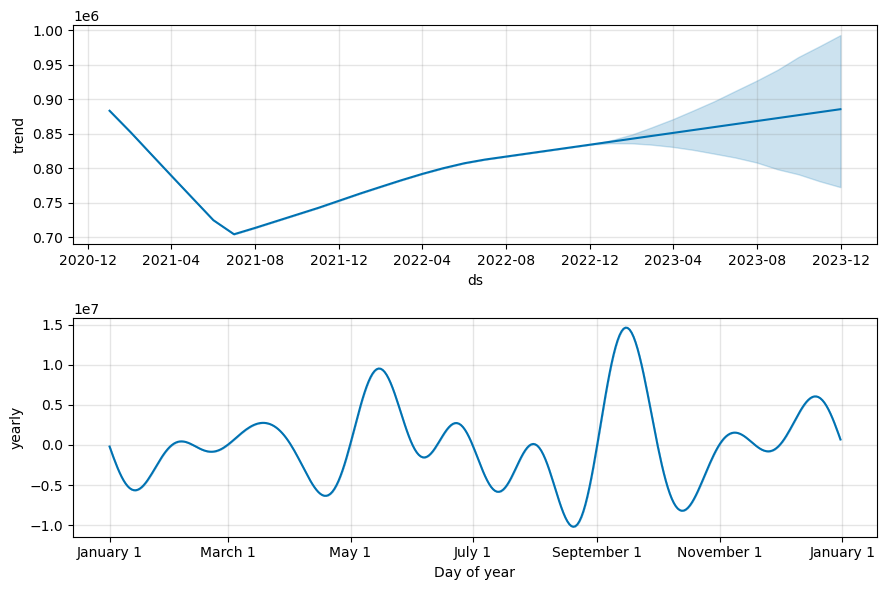

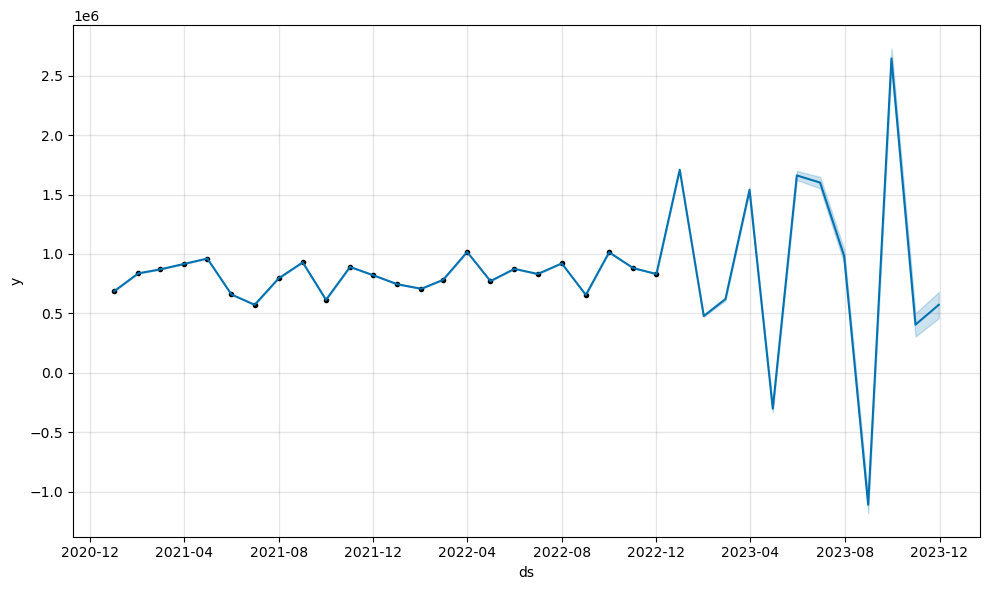

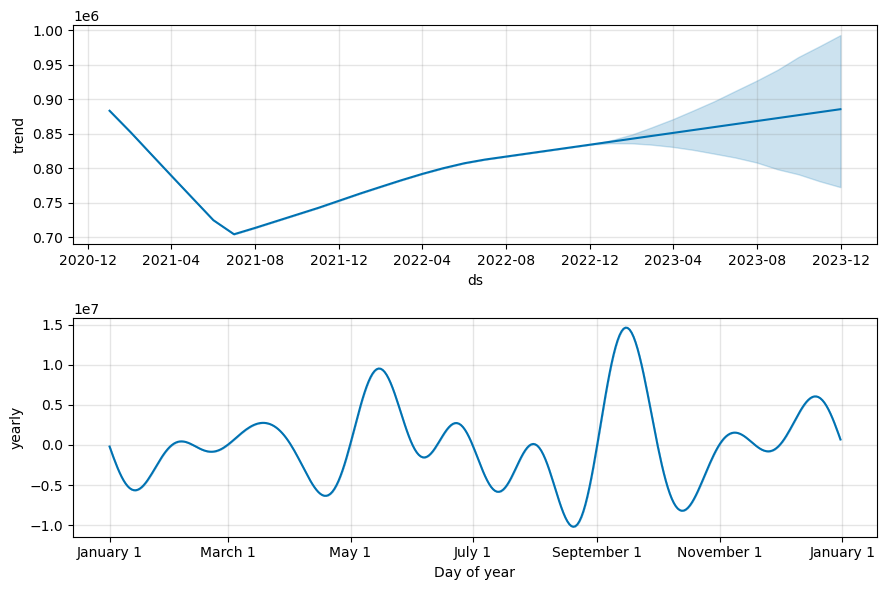

In [38]:
model.plot(forecast)
model.plot_components(forecast)

In [39]:
display(forecast)

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 56, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, aff9914a-34f5-40cc-a423-f58a21a8bffc)

In [40]:
spark.createDataFrame(forecast).write.saveAsTable('sales_forcast', mode='overwrite')

StatementMeta(, bac4afa6-7b9f-4c42-aa39-baf68d8371ad, 57, Finished, Available, Finished)

![semantic link diagram](https://learn.microsoft.com/en-us/fabric/data-science/media/semantic-link-overview/data-flow-with-semantic-link.png)
![matrix full circle](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExN3piendvaXJyMDdhcjJxdHkyanQzemhtM2s1YjBkMjBqdGl1eG9pdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/eIm624c8nnNbiG0V3g/giphy.webp) ![mind blown](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExN2IwazlwY2tlbXBkMGhwaGx2dzRzeXJ1aHRiZDl6YmU4aThuNWJ1cSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/V0IdVIIW1y5d6/giphy.webp)

## Resources
##### sempy documentation here [Sempy](https://semantic-link-labs.readthedocs.io/en/stable/modules.html)
##### semantic link labs [github](https://github.com/microsoft/semantic-link-labs)